In [1]:
import sys
sys.path.append("/users/munozr/mycodes")
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import LinData
import pandas as pd
from data_analysis_codes.tools import NumMethods

In [2]:
paramA = RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM')
param64 = RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM_withlapse_1plog')
param32 = RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM_withlapse_1plog')
param16 = RRead.read_parameters('pflrw_d3e2_L1821_t1_N16_LCDM_withlapse_1plog')
Lin = LinData.LinData_Class(paramA)

fA = pd.read_table(paramA['datapath']+'h5_data.csv', delimiter=',')
fcA = pd.read_table(paramA['datapath']+'constraints.csv', delimiter=',')
f16 = pd.read_table(param16['datapath']+'h5_data.csv', delimiter=',')
fc16 = pd.read_table(param16['datapath']+'constraints.csv', delimiter=',')
f32 = pd.read_table(param32['datapath']+'h5_data.csv', delimiter=',')
fc32 = pd.read_table(param32['datapath']+'constraints.csv', delimiter=',')
f64 = pd.read_table(param64['datapath']+'h5_data.csv', delimiter=',')
fc64 = pd.read_table(param64['datapath']+'constraints.csv', delimiter=',')

 read time file


In [2]:
param = RRead.read_parameters('pflrw_d3e3_L1000_t3e2_N32_EdS_mK')
Lin = LinData.LinData_Class(param)
f = pd.read_table(param['datapath']+'h5_data.csv', delimiter=',')

 read time file


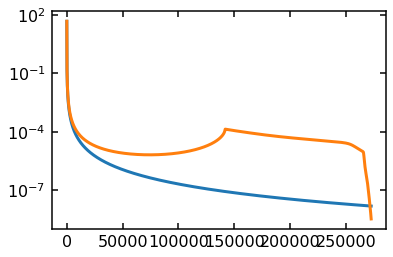

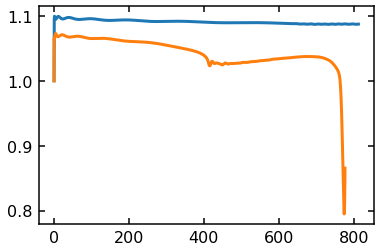

In [10]:
plt.figure()
plt.semilogy(f['it'], f['rho_UD'])
plt.semilogy(f['it'], f['rho_OD'])
plt.figure()
plt.plot(f['tau_UD'], f['alp_UD'])
plt.plot(f['tau_OD'], f['alp_OD'])

In [8]:
1821/64

28.453125

/users/munozr/mycodes/data_analysis_codes/tools/NumMethods.py:80: RuntimeWarning: divide by zero encountered in true_divide
  c = abs(f32-f64)/abs(f64-f128)
No handles with labels found to put in legend.


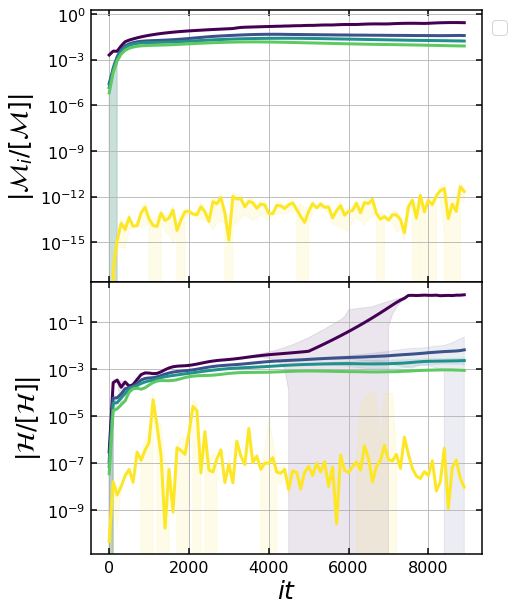

In [3]:
RRead.plot_constraints_with_error(fc16, fc32, fc64)

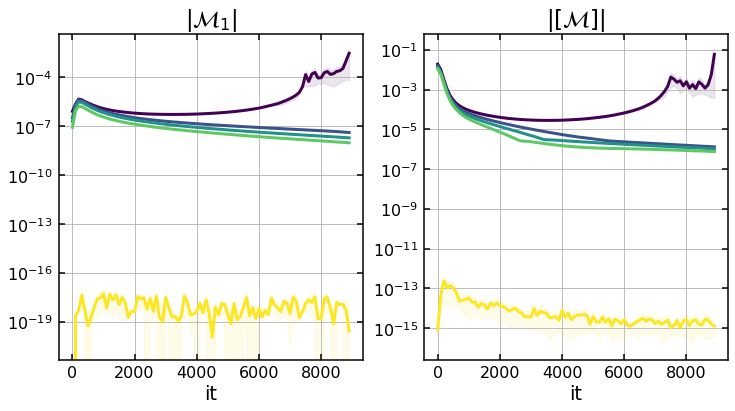

In [47]:
plt.figure(figsize = (12, 6))
locs = ['maxabs', 'highQabs', 'medianabs', 'lowQabs', 'minabs']
cols = plt.cm.viridis(np.linspace(0,1,len(locs)))
alphafac = 0.1

plt.subplot(121)
for i, loc, in enumerate(locs):
    varstr = 'Mom1_'+loc
    var = fc64[varstr]
    plt.semilogy(fc64['it'], var, color=cols[i])
    err = NumMethods.get_error(np.array(fc16[varstr]), 
                                   np.array(fc32[varstr]), var)
    plt.fill_between(fc64['it'], var-err, var+err, color=cols[i], alpha=alphafac)
plt.title(r'$|\mathcal{M}_1|$')
plt.xlabel('it')
plt.grid()
    
plt.subplot(122)
for i, loc, in enumerate(locs):
    varstr = 'MomEScale_'+loc
    var = fc64[varstr]
    plt.semilogy(fc64['it'], var, color=cols[i])
    err = NumMethods.get_error(np.array(fc16[varstr]), 
                                   np.array(fc32[varstr]), var)
    plt.fill_between(fc64['it'], var-err, var+err, color=cols[i], alpha=alphafac)
plt.title(r'$|[\mathcal{M}]|$')
plt.xlabel('it')
plt.grid()

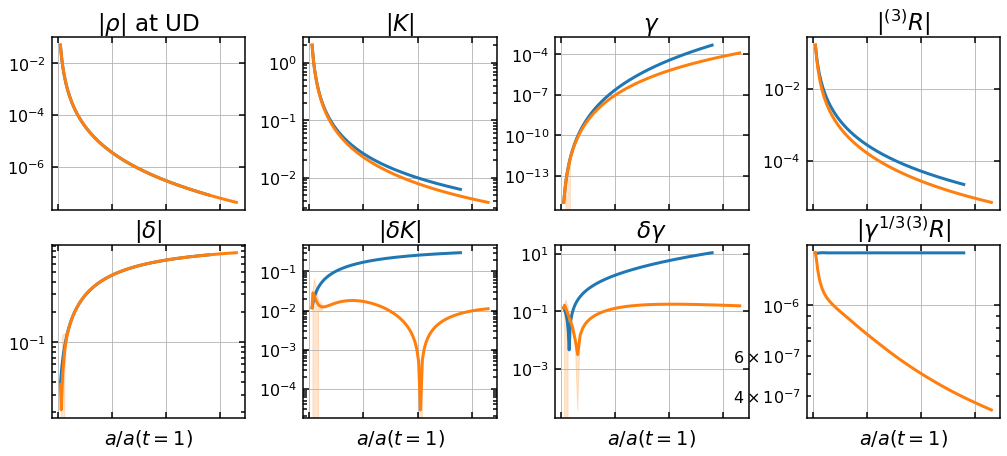

In [55]:
plt.figure(figsize=(17, 7))
loc = 'UD'
anA = Lin.an_initial(fA['t'])
an = f64['an_'+loc] # NEED error bars on an!
alphafac = 0.2

def plot_old(varname):
    plt.semilogy(anA, abs(fA[varname+loc]))

def plot_new(varname):
    varstr = varname+loc
    var = abs(f64[varstr])
    plt.semilogy(an, var)
    err = NumMethods.get_error(np.array(abs(f16[varstr])), np.array(abs(f32[varstr])), var)
    plt.fill_between(an, var-err, var+err, color='C1', alpha=alphafac)

ax1 = plt.subplot(241)
plot_old('rho_')
plot_new('rho_u_')
plt.grid()
plt.title(r'$|\rho|$'+' at '+loc)
ax1.set(xticklabels=[])

ax2 = plt.subplot(242)
plot_old('K_')
plot_new('K_')
plt.grid()
plt.title(r'$|K|$')
ax2.set(xticklabels=[])

ax3 = plt.subplot(243)
plot_old('gdet_')
plot_new('gdet_')
plt.grid()
plt.title(r'$\gamma$')
ax3.set(xticklabels=[])

ax4 = plt.subplot(244)
plot_old('RicciS_')
plot_new('RicciS_')
plt.grid()
plt.title(r'$|{}^{(3)}R|$')
ax4.set(xticklabels=[])

ax5 = plt.subplot(245)
plot_old('drho_')
plot_new('drho_u_')
plt.grid()
plt.title(r'$|\delta|$')
plt.xlabel(r'$a/a(t=1)$')
ax5.set(xticklabels=[])

ax6 = plt.subplot(246)
plot_old('dK_')
plot_new('dK_')
plt.grid()
plt.title(r'$|\delta K|$')
plt.xlabel(r'$a/a(t=1)$')
ax6.set(xticklabels=[])

ax7 = plt.subplot(247)
plot_old('dgdet_')
plot_new('dgdet_')
plt.grid()
plt.title(r'$\delta \gamma$')
plt.xlabel(r'$a/a(t=1)$')
ax7.set(xticklabels=[])

ax8 = plt.subplot(248)
plt.semilogy(anA, abs((fA['gdet_'+loc]**(1/3)) * fA['RicciS_'+loc]))
plt.semilogy(an, abs((f64['gdet_'+loc]**(1/3)) * f64['RicciS_'+loc]))
plt.grid()
plt.title(r'$|\gamma^{1/3} {}^{(3)}R|$')
plt.xlabel(r'$a/a(t=1)$')
ax8.set(xticklabels=[])

plt.subplots_adjust(wspace = 0.3)

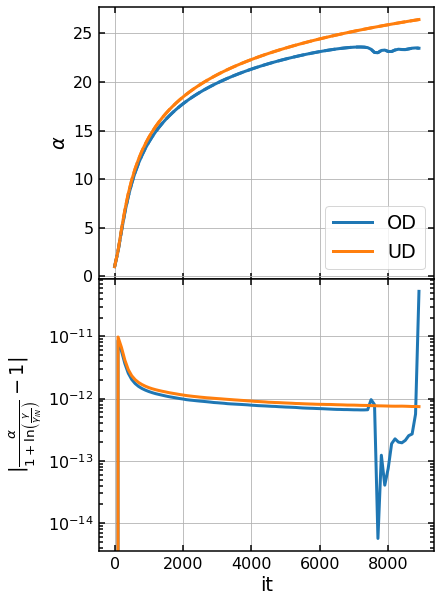

In [63]:
f = f64

plt.figure(figsize=(6, 10))

ax1 = plt.subplot(211)
plt.plot(f['it'], f['alpha_OD'], label='OD')
plt.plot(f['it'], f['alpha_UD'], label='UD')
plt.plot(f['it'], 1+np.log(f['gdet_OD']/f['gdet_OD'][0]), color = 'C0', linestyle = '--')
plt.plot(f['it'], 1+np.log(f['gdet_UD']/f['gdet_UD'][0]), color = 'C1', linestyle = '--')
plt.grid()
ax1.set(xticklabels=[])
plt.ylabel(r'$\alpha$')
plt.legend()

plt.subplot(212)
plt.semilogy(f['it'], abs(f['alpha_OD']/(1+np.log(f['gdet_OD']/f['gdet_OD'][0]))-1))
plt.semilogy(f['it'], abs(f['alpha_UD']/(1+np.log(f['gdet_UD']/f['gdet_UD'][0]))-1))
plt.xlabel('it')
plt.grid()
plt.ylabel(r'$|\frac{\alpha}{1 + \ln\left(\frac{\gamma}{\gamma_{IN}}\right)} - 1|$')

plt.subplots_adjust(hspace = 0)